<a href="https://colab.research.google.com/github/jfernandez37/495Project/blob/main/Directed_consulting_495.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to fao data: https://www.fao.org/faostat/en/#data

Better fao data: https://www.fao.org/faostat/en/#data/TM

In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import plotly
import matplotlib.pyplot as plt

In [2]:
data=sio.loadmat("iFarmData(2015)_1_28_2019.mat")

In [3]:
comparison=pd.read_csv("FAOSTAT_data_4-4-2022.csv")
orgComp=comparison.sort_values(['Value'], ascending=False)
expComp=orgComp.loc[orgComp['Element']=="Export Quantity"]
impComp=orgComp.loc[orgComp['Element']=="Import Quantity"]

In [4]:
print(comparison)

    Domain Code                 Domain  Reporter Country Code (FAO)  \
0            TM  Detailed trade matrix                          231   
1            TM  Detailed trade matrix                          231   
2            TM  Detailed trade matrix                          231   
3            TM  Detailed trade matrix                          231   
4            TM  Detailed trade matrix                          231   
..          ...                    ...                          ...   
571          TM  Detailed trade matrix                          231   
572          TM  Detailed trade matrix                          231   
573          TM  Detailed trade matrix                          231   
574          TM  Detailed trade matrix                          231   
575          TM  Detailed trade matrix                          231   

           Reporter Countries  Partner Country Code (FAO) Partner Countries  \
0    United States of America                         138           

In [5]:
printParam=['Item','Value','Unit']
printNum=10
print("Exports from US to Mexico")
print(expComp[printParam].head(printNum))
print("\n\n\n\nImports from Mexico to US")
print(impComp[printParam].head(printNum))

Exports from US to Mexico
                                     Item     Value    Unit
293                                 Maize  14637483  tonnes
488                              Soybeans   4968772  tonnes
565                                 Wheat   3148010  tonnes
63                         Cake, soybeans   1756990  tonnes
149      Dregs from brewing, distillation   1742136  tonnes
199             Fructose and syrup, other    939307  tonnes
314                         Meat, chicken    726674  tonnes
467                           Rice, paddy    522343  tonnes
322                             Meat, pig    468444  tonnes
469  Rice, paddy (rice milled equivalent)    430491  tonnes




Imports from Mexico to US
                            Item    Value    Unit
31                Beer of barley  3089012  tonnes
525                     Tomatoes  1668601  tonnes
97   Chillies and peppers, green  1010146  tonnes
17                      Avocados  1004962  tonnes
144       Cucumbers and gherkins  

In [6]:
#print(stuff)

In [7]:
print(type(data))
print(type(data['Pr_Crop_US']))

<class 'dict'>
<class 'numpy.ndarray'>


In [60]:
#For getting yield
search=str(input())
coID=122
gCount=0
year=54
for i in range(169):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
    #print(cropID)
    print("\n")
    print(str(float(data['Yield_FAO'][206][cropID][year])*float(data['AreaH_FAO'][206][cropID][year])/1000) + " metric tonnes of "+ cropName +" produced in " + str(1961+year))

maize


345484896.8130001 metric tonnes of Maize produced in 2015


3524856.3519999995 metric tonnes of Maize; green produced in 2015


In [27]:
search=str(input())
coID=122
gCount=0
for i in range(169):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
    gCount+=1
    y=data['Pr_Crop_US'][122][cropID]
    #print(len(stuff['Pr_Crop_US'][0][0]))
    x=np.arange(1961,2016)
    plt.figure(i)
    plt.title(coName+ " "+cropName+ " Graph")
    plt.xlabel("Year")
    plt.ylabel("Crop price at farmer's gate (USD/KG) for " + cropName)
    plt.plot(x,y,color="red")
    plt.show

KeyboardInterrupt: ignored

In [ ]:
print("total number of graphs " + str(gCount))

The crop price starts to stabalize around the time that nafta was enacted (1994)

Index for US: 206
Index for Mexico: 122
Index for Canada: 33

apple


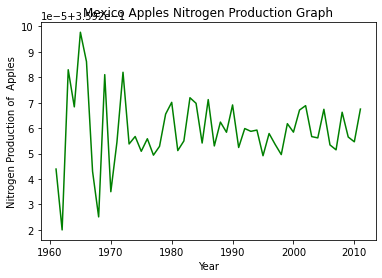

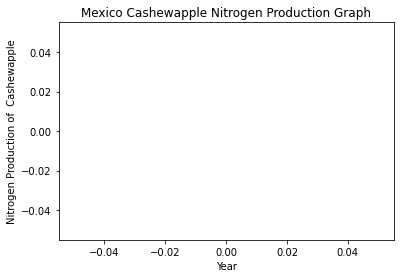

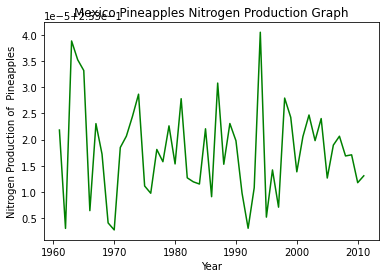

In [51]:
search=str(input())
coID=122
gCount=0
for i in range(len(data['Pr_Crop_US'][coID])):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
  #if 1:
    gCount+=1
    y=data['Pr_Crop_US'][coID][cropID]
    #print(len(stuff['Pr_Crop_US'][0][0]))
    x=np.arange(1961,2016)
    plt.figure(i)
    plt.title(coName+ " "+cropName+ " Nitrogen Production Graph")
    plt.xlabel("Year")
    plt.ylabel("Nitrogen Production of  " + cropName)
    plt.plot(x,y,color="green")
    plt.show

In [ ]:
search=str(input())
countriesID=[122,206]
colors=['red','gold']
gCount=0
counter=0
for j in countriesID:
  coID=j
  counter+=1
  for i in range(len(data['Pr_Crop_US'][coID])):
    cropID=i
    cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
    testSplit=cropName.split("[")
    cropName=testSplit[2].split("]")[0]
    cropName=cropName.replace("'","")
    coName=str(data['FAOSTAT_CoName_FAO'][coID])
    testSplitCo=coName.split("[")
    coName=testSplitCo[2].split("]")[0]
    coName=coName.replace("'","")
    #print(cropName)
    if search.upper() in cropName.upper():
    #if 1:
      gCount+=1
      y=data['Yield_FAO'][coID][cropID]
      #print(len(stuff['Pr_Crop_US'][0][0]))
      x=np.arange(1961,2016)
      plt.figure(i)
      plt.title(coName+ " "+cropName+ " Total Crop Yield Graph")
      plt.xlabel("Year")
      plt.ylabel("Crop yield(kg/km2): " + cropName)
      plt.plot(x,y,color=colors[counter-1],label=coName)
      plt.legend()
      plt.show

In [ ]:
search=str(input())
countriesID=[122,206]
colors=['blue','green']
gCount=0
counter=0
for j in countriesID:
  coID=j
  counter+=1
  for i in range(len(data['Nyield_kgkm'][coID])):
    cropID=i
    cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
    testSplit=cropName.split("[")
    cropName=testSplit[2].split("]")[0]
    cropName=cropName.replace("'","")
    coName=str(data['FAOSTAT_CoName_FAO'][coID])
    testSplitCo=coName.split("[")
    coName=testSplitCo[2].split("]")[0]
    coName=coName.replace("'","")
    #print(cropName)
    if search.upper() in cropName.upper():
    #if 1:
      gCount+=1
      y=data['Nyield_kgkm'][coID][cropID]
      #print(len(stuff['Pr_Crop_US'][0][0]))
      x=np.arange(1961,2016)
      plt.figure(i)
      plt.title(cropName+ " Total Crop Nitrogen Yield Graph")
      plt.xlabel("Year")
      plt.ylabel("Nitrogen yield(kg/km): " + cropName)
      plt.plot(x,y,color=colors[counter-1],label=coName)
      plt.legend()
      plt.show

In [ ]:
y=data['Nyield_kgkm'][206][124]
print(len(data['Pr_Crop_US'][0][1]))
x=np.arange(1961,2016)
plt.title("US Nitrogen content yield graph")
plt.xlabel("Year")
plt.ylabel("Nitrogen content (kg)")
plt.plot(x,y,color="green")
plt.show

In [ ]:
y=data['netImTrade'][124][5][5]
#print(len(stuff['Pr_Crop_US'][0][1]))
x=np.arange(0,218)
plt.title("Net trade of potatoes in the US")
plt.xlabel("Year")
plt.ylabel("kg of potatoes")
plt.plot(x,y,color="brown")
plt.show

In [38]:
for i in range(170):
  print(data['FAOSTAT_CrName_FAO'][i])
  print("Index" +str(i))

[array(['Agave Fibres Nes'], dtype='<U16')]
Index0
[array(['Almonds; with shell'], dtype='<U19')]
Index1
[array(['Anise; badian; fennel; corian.'], dtype='<U30')]
Index2
[array(['Apples'], dtype='<U6')]
Index3
[array(['Apricots'], dtype='<U8')]
Index4
[array(['Arecanuts'], dtype='<U9')]
Index5
[array(['Artichokes'], dtype='<U10')]
Index6
[array(['Asparagus'], dtype='<U9')]
Index7
[array(['Avocados'], dtype='<U8')]
Index8
[array(['Bambara beans'], dtype='<U13')]
Index9
[array(['Bananas'], dtype='<U7')]
Index10
[array(['Barley'], dtype='<U6')]
Index11
[array(['Beans; dry'], dtype='<U10')]
Index12
[array(['Beans; green'], dtype='<U12')]
Index13
[array(['Berries Nes'], dtype='<U11')]
Index14
[array(['Blueberries'], dtype='<U11')]
Index15
[array(['Brazil nuts; with shell'], dtype='<U23')]
Index16
[array(['Broad beans; horse beans; dry'], dtype='<U29')]
Index17
[array(['Buckwheat'], dtype='<U9')]
Index18
[array(['Cabbages and other brassicas'], dtype='<U28')]
Index19
[array(['Canary seed'], 

In [37]:
for i in range(209):
  print(data['FAOSTAT_CoName_FAO'][i])
  print("Index" +str(i))

[array(['Afghanistan'], dtype='<U11')]
Index0
[array(['Albania'], dtype='<U7')]
Index1
[array(['Algeria'], dtype='<U7')]
Index2
[array(['American Samoa'], dtype='<U14')]
Index3
[array(['Angola'], dtype='<U6')]
Index4
[array(['Antigua and Barbuda'], dtype='<U19')]
Index5
[array(['Argentina'], dtype='<U9')]
Index6
[array(['Armenia'], dtype='<U7')]
Index7
[array(['Australia'], dtype='<U9')]
Index8
[array(['Austria'], dtype='<U7')]
Index9
[array(['Azerbaijan'], dtype='<U10')]
Index10
[array(['Bahamas'], dtype='<U7')]
Index11
[array(['Bahrain'], dtype='<U7')]
Index12
[array(['Bangladesh'], dtype='<U10')]
Index13
[array(['Barbados'], dtype='<U8')]
Index14
[array(['Belarus'], dtype='<U7')]
Index15
[array(['Belgium'], dtype='<U7')]
Index16
[array(['Belgium-Luxembourg'], dtype='<U18')]
Index17
[array(['Belize'], dtype='<U6')]
Index18
[array(['Benin'], dtype='<U5')]
Index19
[array(['Bermuda'], dtype='<U7')]
Index20
[array(['Bhutan'], dtype='<U6')]
Index21
[array(['Bolivia (Plurinational State of

In [41]:
for i in range(209):
  print(data['FAOSTAT_CoName_FAO'][i])
  print(data['FAOSTAT_CoCODE_FAO'][i])
  print("Index" +str(i))

[array(['Afghanistan'], dtype='<U11')]
[2]
Index0
[array(['Albania'], dtype='<U7')]
[3]
Index1
[array(['Algeria'], dtype='<U7')]
[4]
Index2
[array(['American Samoa'], dtype='<U14')]
[5]
Index3
[array(['Angola'], dtype='<U6')]
[7]
Index4
[array(['Antigua and Barbuda'], dtype='<U19')]
[8]
Index5
[array(['Argentina'], dtype='<U9')]
[9]
Index6
[array(['Armenia'], dtype='<U7')]
[1]
Index7
[array(['Australia'], dtype='<U9')]
[10]
Index8
[array(['Austria'], dtype='<U7')]
[11]
Index9
[array(['Azerbaijan'], dtype='<U10')]
[52]
Index10
[array(['Bahamas'], dtype='<U7')]
[12]
Index11
[array(['Bahrain'], dtype='<U7')]
[13]
Index12
[array(['Bangladesh'], dtype='<U10')]
[16]
Index13
[array(['Barbados'], dtype='<U8')]
[14]
Index14
[array(['Belarus'], dtype='<U7')]
[57]
Index15
[array(['Belgium'], dtype='<U7')]
[255]
Index16
[array(['Belgium-Luxembourg'], dtype='<U18')]
[15]
Index17
[array(['Belize'], dtype='<U6')]
[23]
Index18
[array(['Benin'], dtype='<U5')]
[53]
Index19
[array(['Bermuda'], dtype='<U7